### 내 풀이
https://programmers.co.kr/learn/courses/30/lessons/42584

- 못풀었다!

In [5]:
def solution(prices):
    """
    주식 가격이 담긴 배열 prices
    가격이 떨어지지 않은 기간은 몇초인지를 return
    prices의 길이는 100000이므로 for문 두번 돌리면 위험함.
    
    [1,2,3,2,3]
    [4,3,1,1,0]
    
    그냥 for 문으로 인풋을 하나씩 뽑은다음에, 해당 값의 가격이 떨어지지 않은 기간을 각각 계산하면 될듯? -> 근데 이건 for문 두번쓴거임;;;
    max 한번 써서 시간 줄여도 될거같기도 하고.
    
    개썩은 풀이. 이거는 좀 감이 안잡힘
    
    """
    answer = []
    #1. idx 로 prices 슬라이싱 
    for idx, price in enumerate(prices):
        
        #2. 함수 작성 : 떨어지지 않은 시간 계산하기. 이때 미리 이레귤러 타입에 대해서 값을 정해버려도 될듯.
        if idx == len(prices) - 1: # 끝 순번
            maintained_time = 0
        else:
            maintained_time = calculate_maintained_time(price, prices[idx+1:])
            
        answer.append(maintained_time)
        
    return answer

def calculate_maintained_time(price, price_list_except_me):
    _stack = []
    
    #3. 비교하여 스택에 넣기
    for p in price_list_except_me:
        if price <= p:
            _stack.append(p)
        else:
            break
    
    #4. 예외 처리
    if _stack:
        maintained_time = len(_stack)
    else:
        maintained_time = 1
    
    return maintained_time

In [6]:
prices = [1, 2, 3, 2, 3]
solution(prices)

[4, 3, 1, 1, 0]

In [7]:
prices = [1, 1, 1, 1, 1]
solution(prices)

[4, 3, 2, 1, 0]

### 풀이 1

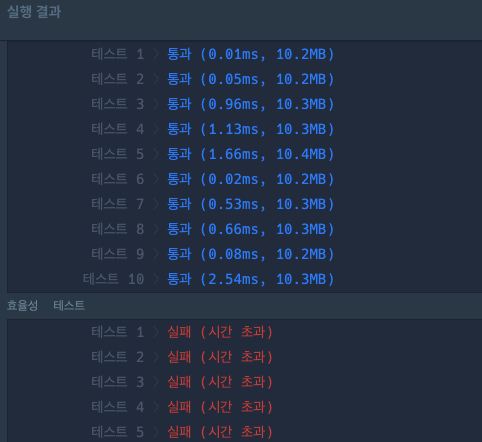

In [18]:
# brute force 풀이

def solution(prices):
    
    #1. list 초기화
    answer = [0] * len(prices) # [0,0,0,0,0] -> 이런 방식으로 값을 저장하는걸 내가 어색해하는듯.
    
    #2. 이중 for 문으로 비교
    for idx, curr_price in enumerate(prices):
        for next_price in prices[idx+1:]: # idx가 넘어가는 경우를 신경쓸 필요가 없구나.. 알아서 아래 코드가 실행이 안됨.
            
            #3. curr_price가 next_price 보다 작거나 같은 경우 : 시간을 증가시킴
            if curr_price <= next_price:
                answer[idx] += 1
            
            #4. else인 경우 : 똑같이 시간을 증가시킨 후 break
            else:
                answer[idx] += 1
                break
    
    return answer

In [19]:
prices = [1, 2, 3, 2, 3]
solution(prices)

[4, 3, 1, 1, 0]

### 풀이 1 :미친;; for 문을 쓰는 방법에서도 효율성 차이가 나버린다.

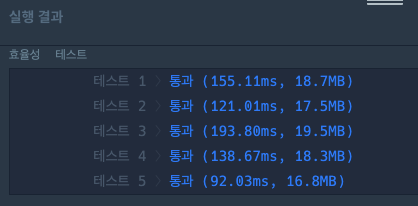

In [20]:
def solution(prices):
    
    #1. list 초기화
    answer = [0] * len(prices)
    
    #2. 이중 for문으로 brute force 식 풀이
    for i in range(len(prices)):
        for j in range(i+1, len(prices)):
            
            if prices[i] <= prices[j]:
                answer[i] += 1
            
            else:
                answer[i] += 1
                break
                
    return answer

In [21]:
prices = [1, 2, 3, 2, 3]
solution(prices)

[4, 3, 1, 1, 0]

### 스택을 사용한 풀이

- 풀이를 읽어봤는데 한국말로도 이해가 안되었다....
- 진짜 찬찬히 i=0부터 쭉 따라했는데 내 언어로 설명이 안됨 ㅠㅠ 스택에서 말리네;;;
- https://gurumee92.tistory.com/170

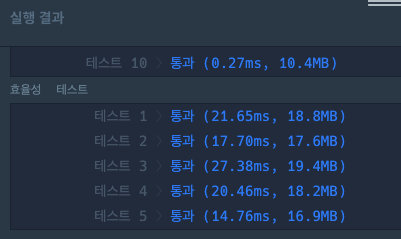

In [ ]:
def solution(prices):
    n = len(prices)
    # 1. answer를 prices 길이와 맞춘다.
    answer = [0] * n
    # 2. 스택 생성
    st = []
    # 3. 0 ~ n-1 초까지 순회
    for i in range(n):
        # 1. 스택 비지 않고, prices[top] > prices[i] 이라면 다음 반복
        # 1-1. 스택에서 마지막에 저장된 시간 top 꺼냄
        # 1-2. answer[top]에 i - top을 저장
        while st and prices[st[-1]] > prices[i]:
            top = st.pop()
            answer[top] = i - top
        # 2. 스택에 현재 시간 i 저장
        st.append(i)
    
    # 4. 만약 스택이 남아있다면, 스택이 빌 때까지 다음 반복
    while st:
        # 1. 스택에서 마지막에 저장된 시간 top 꺼냄
        # 2. answer[top]에 가장 마지막 시간 n - i 에서 top을 뺸 시간 저장
        top = st.pop()
        answer[top] = n - 1 - top
    
    return answer
            
            

### 스택을 사용한 풀이 2 : for 문 두번 돌린거랑 별반 다를바가 없는데 속도가 괜찮네

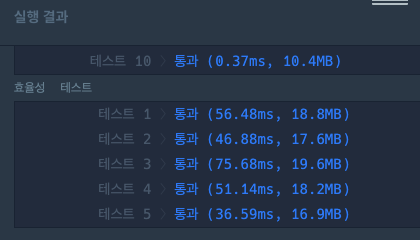

In [24]:
from collections import deque
def solution(prices):
    
    #1. 큐에 인풋을 다 박음
    prices = deque(prices)
    answer = []
    
    #2. loop
    while prices:
        curr_price = prices.popleft()
        count = 0
        
        #3. loop 두개 돌린것과 같음. 앞 풀이와 별반 다를바가 없네.
        for p in prices:
            
            # 감소세가 시작될 경우, 1 올리고 바로 break
            if curr_price > p:
                count += 1
                break
            
            # 감소세가 시작 안될 경우에는 계속 1씩 올림.
            count += 1
            
        answer.append(count)
    
    return answer

In [25]:
prices = [1, 2, 3, 2, 3]
solution(prices)

[4, 3, 1, 1, 0]